In [1]:
# !pip install matplotlib

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

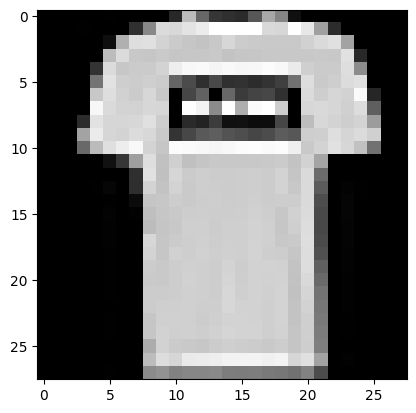

In [4]:
show_img = training_data[1][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

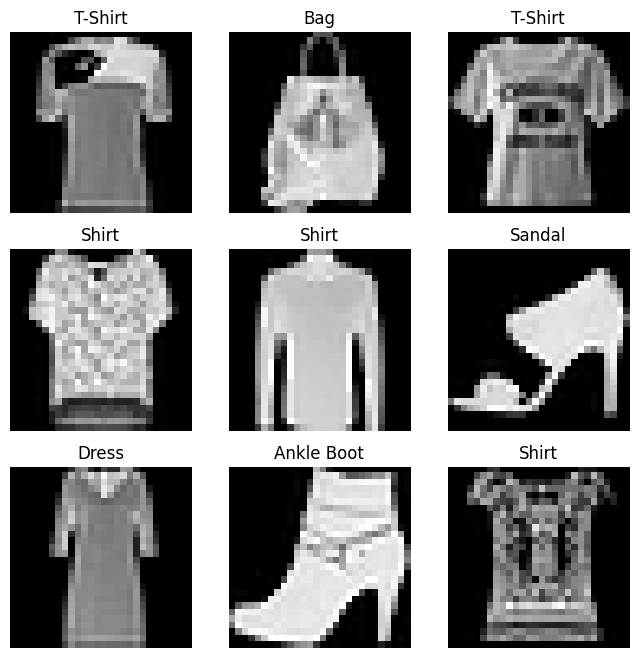

In [5]:
# show 9 random images
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()  


Create data loaders

In [6]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


Create Neural Network class

In [8]:
class LogisticRegression(nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, x):
        x = self.flatten(x)
        y_predicted = (self.linear(x))
        return y_predicted
    
model = LogisticRegression().to(device)
print(model)

LogisticRegression(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)    #lr - learning rate

Create training function

In [10]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    avg_loss = 0
    correct = 0
    for batch_nr, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device) 

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        avg_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_nr % 100 == 0:
            loss, current = loss.item(), batch_nr * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
    avg_loss /= num_batches
    correct /= size
    return avg_loss, correct

Create test function

In [11]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    accuracy = 100 * correct
    print(f"Test Error: \n Accuracy: {(accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Training the model

In [12]:
train_losses = []
train_accuracies = []
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    avg_loss, avg_acc = train(train_dataloader, model, loss_fn, optimizer)
    train_losses.append(avg_loss)
    train_accuracies.append(avg_acc)
    test(test_dataloader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 2.316623  [    0/60000]
loss: 2.132985  [ 6400/60000]
loss: 1.895406  [12800/60000]
loss: 1.784774  [19200/60000]
loss: 1.669432  [25600/60000]
loss: 1.590951  [32000/60000]
loss: 1.496775  [38400/60000]
loss: 1.416376  [44800/60000]
loss: 1.417143  [51200/60000]
loss: 1.407113  [57600/60000]
Test Error: 
 Accuracy: 65.7%, Avg loss: 1.347668 

Epoch 2
-------------------------------
loss: 1.278057  [    0/60000]
loss: 1.305147  [ 6400/60000]
loss: 1.273093  [12800/60000]
loss: 1.368537  [19200/60000]
loss: 1.160551  [25600/60000]
loss: 1.128564  [32000/60000]
loss: 1.110211  [38400/60000]
loss: 1.018875  [44800/60000]
loss: 1.083589  [51200/60000]
loss: 1.117388  [57600/60000]
Test Error: 
 Accuracy: 67.1%, Avg loss: 1.092430 

Epoch 3
-------------------------------
loss: 1.117966  [    0/60000]
loss: 1.159698  [ 6400/60000]
loss: 0.996422  [12800/60000]
loss: 1.096880  [19200/60000]
loss: 1.077105  [25600/60000]
loss: 1.065216  [32000/600

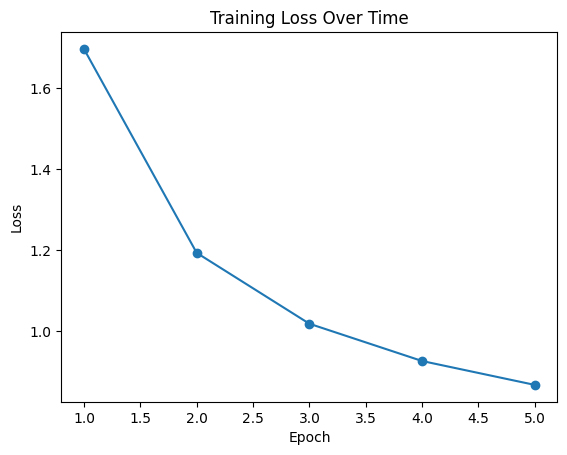

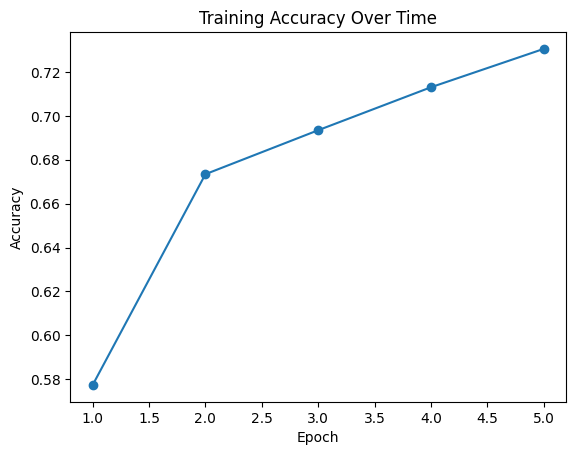

In [16]:
# Plot the loss over time
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

# Plot the accuracy over time
plt.plot(range(1, epochs + 1), train_accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Time')
plt.show()

Testing the model

In [14]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
model.eval()
for i in range(10):
    x, y = test_data[i][0], test_data[i][1]
    with torch.no_grad():
        pred = model(x)
        predicted = classes[pred[0].argmax(0)]
        actual = classes[y]
        print(f'Predicted: "{predicted}", Actual: "{actual}"')



Predicted: "Ankle boot", Actual: "Ankle boot"
Predicted: "Pullover", Actual: "Pullover"
Predicted: "Trouser", Actual: "Trouser"
Predicted: "Trouser", Actual: "Trouser"
Predicted: "Shirt", Actual: "Shirt"
Predicted: "Trouser", Actual: "Trouser"
Predicted: "Coat", Actual: "Coat"
Predicted: "Coat", Actual: "Shirt"
Predicted: "Sneaker", Actual: "Sandal"
Predicted: "Sneaker", Actual: "Sneaker"


In [15]:

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy}%')


NameError: name 'total' is not defined

## Conclusion

In this notebook, I implemented a logistic regression model using PyTorch to classify images from the FashionMNIST dataset, following the steps. I loaded the dataset and visualized some sample images. I created data loaders for training and testing datasets. I defined a logistic regression model using PyTorch's `nn.Module`. I implemented and executed a training loop to train the model over multiple epochs. I evaluated the model's performance on the test dataset and calculated the accuracy.

The final accuracy of the model on the test dataset was approximately `77.89%`. This demonstrates that the logistic regression model can effectively classify the FashionMNIST images, although there is room for improvement with more complex models or additional training techniques.